In [ ]:
from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


Notes:

LAMA probes rely on the MLM decoding head to complete cloze
statement tasks. Note that this decoder is only trained for the mask token embedding of the final layer and is unsuitable if we want to probe all layers of BERT. To overcome this we train a new decoding head for each layer of a BERT model under investigation.

In [ ]:
import os
os.chdir('/content/drive/MyDrive/G2 2021 Fall/AC 297R Capstone/BERTnesia-knowledge-probing-master')
!ls

BERTnesiaProbing.ipynb	prediction_explorer.png      run_probing_recursive.sh
data			pre-trained_language_models  run_probing.sh
download_models.sh	README.md		     scripts
knowledge_probing	requirements.txt	     test_dir
LICENSE			run_probing.py		     vocab.txt


In [ ]:
!pip install -r requirements.txt
# may need to restart runtime

     |████████████████████████████████| 293 kB 4.2 MB/s 
     |████████████████████████████████| 499 kB 76.9 MB/s 
     |████████████████████████████████| 5.6 MB 95.7 MB/s 
     |████████████████████████████████| 9.1 MB 21.2 MB/s 
     |████████████████████████████████| 1.7 MB 50.3 MB/s 
     |████████████████████████████████| 829 kB 62.6 MB/s 
     |████████████████████████████████| 596 kB 79.8 MB/s 
     |████████████████████████████████| 1.2 MB 34.2 MB/s 
     |████████████████████████████████| 131 kB 93.6 MB/s 
     |████████████████████████████████| 895 kB 52.7 MB/s 
     |████████████████████████████████| 43 kB 2.4 MB/s 
     |████████████████████████████████| 1.3 MB 54.5 MB/s 
     |████████████████████████████████| 496 kB 89.4 MB/s 
     |████████████████████████████████| 111 kB 59.3 MB/s 
     |████████████████████████████████| 180 kB 82.9 MB/s 
     |████████████████████████████████| 4.3 MB 59.2 MB/s 
     |████████████████████████████████| 178 kB 67.7 MB/s 
     |███████████

In [ ]:
import torch
import pytorch_lightning
import transformers
import tokenizers
import dotmap
import pandas
import plotly
import tqdm
import sklearn
import knockknock
import streamlit 
import wandb
import os

In [ ]:
print(torch.__version__)

1.10.0+cu111


In [ ]:
os.chdir('/content/drive/MyDrive/G2 2021 Fall/AC 297R Capstone/BERTnesia-knowledge-probing-master/scripts/')
! sh setup.sh 

In [ ]:
# download git-lfs for downloading checkpoint models
# source: https://colab.research.google.com/github/AliaksandrSiarohin/articulated-animation/blob/master/demo.ipynb#scrollTo=2LoHDHBHyzzZ
!curl -s https://packagecloud.io/install/repositories/github/git-lfs/script.deb.sh | sudo bash
!sudo apt-get install git-lfs
!git lfs install

!chmod +x download_models.sh
!./download_models.sh

In [ ]:
os.chdir('/content/drive/MyDrive/G2 2021 Fall/AC 297R Capstone/BERTnesia-knowledge-probing-master/')
!python run_probing.py \
        --decoder_type Huggingface_pretrained_decoder \
        --do_probing \
        --probing_layer 10 \
        --use_model_from_dir \
        --model_dir /content/drive/MyDrive/G2\ 2021\ Fall/AC\ 297R\ Capstone/BERTnesia-knowledge-probing-master/pre-trained_language_models/bert/multiberts-seed_0-step_2000k
!python run_probing.py \
        --decoder_type Huggingface_pretrained_decoder \
        --do_probing \
        --probing_layer 8 \
        --use_model_from_dir \
        --model_dir /content/drive/MyDrive/G2\ 2021\ Fall/AC\ 297R\ Capstone/BERTnesia-knowledge-probing-master/pre-trained_language_models/bert/multiberts-seed_0-step_2000k

In [ ]:
os.chdir('/content/drive/MyDrive/G2 2021 Fall/AC 297R Capstone/BERTnesia-knowledge-probing-master/')
!chmod +x run_probing_recursive.sh
!./run_probing_recursive.sh

Streaming output truncated to the last 5000 lines.
	relation:	place_of_death
	precision_at_k:	100

100% 48/48 [00:18<00:00,  2.64it/s]
Number metrics elements: 766
Aggregated: 0.0
*****************   Squad   **********************
----------------  ----------------------
Args:
	dataset_filename:	data/probing_data/data/Squad/test.jsonl
	template:	
	relation:	test
	precision_at_k:	100

100% 20/20 [00:07<00:00,  2.69it/s]
Number metrics elements: 305
Aggregated: 0.0
finish
MultiBERTs Seed 3 Step 140k Layer 8
Learning rate 5e-05
Run identifier:  _uncased_trained-False_Huggingface_pretrained_decoder_multiberts-seed_3-step_140k_8
data/outputs/_uncased_trained-False_Huggingface_pretrained_decoder_multiberts-seed_3-step_140k_8
Using models own mlm head
Hparams in init: Namespace(accumulate_grad_batches=1, amp_level='O1', auto_lr_find=False, auto_scale_batch_size=False, auto_select_gpus=False, batch_size=8, benchmark=False, bert_model_type='bert-base-uncased', check_val_every_n_epoch=1, checkpo

In [ ]:
# os.chdir('/content/drive/MyDrive/G2 2021 Fall/AC 297R Capstone/BERTnesia-knowledge-probing-master/')
# !python run_probing.py \
#         --decoder_type 'Huggingface_pretrained_decoder' \
#         --bert_model_type "google/multiberts-seed_0-step_2000k" \
#         --do_training \
#         --do_probing \
#         --probing_layer 1

In [ ]:
# ! sh run_probing.sh

### Streamlit Prediction Explorer

In [ ]:
# !pip install streamlit
!streamlit hello

In [ ]:
!streamlit run scripts/prediction_explorer.py

### Plot

In [2]:
import json
import numpy as np

dataset = 'Google_RE'
dataset_mean_p10 = []

for seed in ['0', '1', '2', '3', '4']:
  print('seed', seed)
  results_seed_p10 = []
  for ckpt in ['0', '20', '60', '100', '140', '400', '700', '1500', '2000']:
    print('ckpt', ckpt)
    results_ckpt_p10 = []
    for layer in ['1', '2', '4', '6', '8', '10', '12']:
      print(layer, 'layer')
      results_layer_p10 = []
      f = open('/content/drive/MyDrive/G2 2021 Fall/AC 297R Capstone/BERTnesia-knowledge-probing-master/data/outputs/_uncased_trained-False_Huggingface_pretrained_decoder_multiberts-seed_'+seed+'-step_'+ckpt+'k_'+layer+'/model_data.json', 'r')
      data = json.loads(f.read())
      for rel in ['place_of_birth', 'date_of_birth', 'place_of_death']:
          results_layer_p10.append(data[dataset][rel][0]['P_AT_10'])
      results_ckpt_p10.append(np.mean(results_layer_p10))
    results_seed_p10.append(results_ckpt_p10)
  dataset_mean_p10.append(results_seed_p10)


seed 0
ckpt 0
1 layer
2 layer
4 layer
6 layer
8 layer
10 layer
12 layer
ckpt 20
1 layer
2 layer
4 layer
6 layer
8 layer
10 layer
12 layer
ckpt 60
1 layer
2 layer
4 layer
6 layer
8 layer
10 layer
12 layer
ckpt 100
1 layer
2 layer
4 layer
6 layer
8 layer
10 layer
12 layer
ckpt 140
1 layer
2 layer
4 layer
6 layer
8 layer
10 layer
12 layer
ckpt 400
1 layer
2 layer
4 layer
6 layer
8 layer
10 layer
12 layer
ckpt 700
1 layer
2 layer
4 layer
6 layer
8 layer
10 layer
12 layer
ckpt 1500
1 layer
2 layer
4 layer
6 layer
8 layer
10 layer
12 layer
ckpt 2000
1 layer
2 layer
4 layer
6 layer
8 layer
10 layer
12 layer
seed 1
ckpt 0
1 layer
2 layer
4 layer
6 layer
8 layer
10 layer
12 layer
ckpt 20
1 layer
2 layer
4 layer
6 layer
8 layer
10 layer
12 layer
ckpt 60
1 layer
2 layer
4 layer
6 layer
8 layer
10 layer
12 layer
ckpt 100
1 layer
2 layer
4 layer
6 layer
8 layer
10 layer
12 layer
ckpt 140
1 layer
2 layer
4 layer
6 layer
8 layer
10 layer
12 layer
ckpt 400
1 layer
2 layer
4 layer
6 layer
8 layer
10 la

In [14]:
dataset_mean_p10_np = np.array(dataset_mean_p10)
dataset_mean_p10_np.shape

(5, 9, 7)

In [3]:
import numpy as np
# with open('/content/drive/MyDrive/G2 2021 Fall/AC 297R Capstone/LAMAProbing_Copy/google_mean_p10_np_layer.npy', 'wb') as f:
#     np.save(f, dataset_mean_p10_np)
dataset_mean_p10_np = np.load('/content/drive/MyDrive/G2 2021 Fall/AC 297R Capstone/LAMAProbing_Copy/google_mean_p10_np_layer.npy')

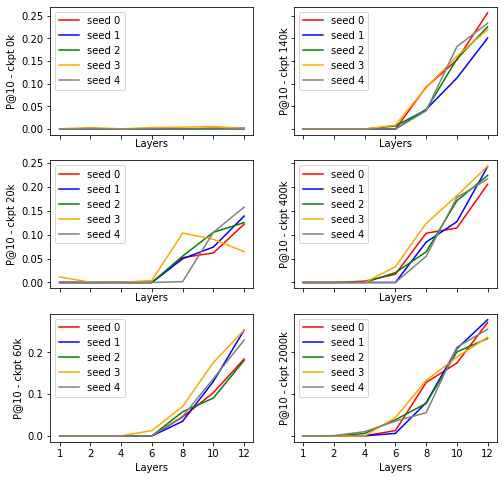

In [18]:
# plot for poster
import matplotlib.pyplot as plt
num_seeds = 5
colors = ['r', 'b', 'g', 'orange', 'grey']
row, col = 3, 2
fig, ax = plt.subplots(row, col, figsize=(8,8), sharex='col', sharey='row')
for i, ckpt in enumerate(['0', '20', '60', '140', '400', '2000']):
  for seed in range(5):
    ax[i%row, i//row].plot(range(0, 7), dataset_mean_p10_np[seed][i], c=colors[seed], label='seed %s' %str(seed))
  ax[i%row, i//row].legend(loc='upper left')
  ax[i%row, i//row].set_xticks(range(0, 7))
  ax[i%row, i//row].set_xticklabels(['1', '2', '4', '6', '8', '10', '12'])
  ax[i%row, i//row].set_xlabel("Layers")
  ax[i%row, i//row].set_ylabel("P@10 - ckpt " + ckpt + 'k')
  # ax[i].set_title("GoogleRE Mean Results - Checkpoint " + ckpt)
plt.show()

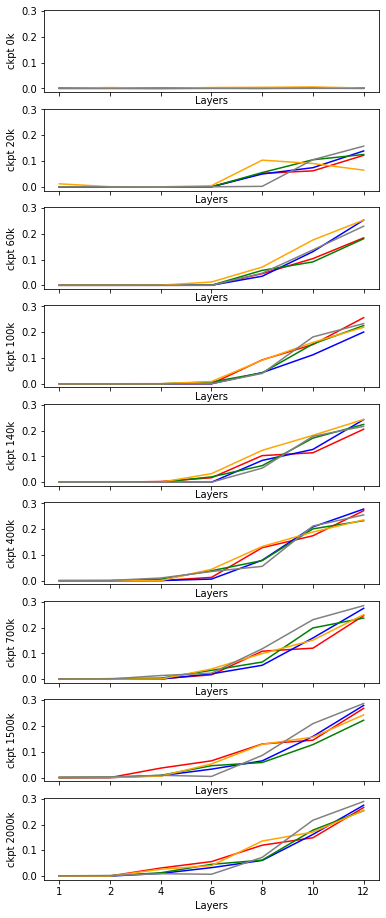

In [7]:
import matplotlib.pyplot as plt
num_seeds = 5
colors = ['r', 'b', 'g', 'orange', 'grey']

fig, ax = plt.subplots(9, 1, figsize=(6,16), sharex='col', sharey='col')
for i, ckpt in enumerate(['0', '20', '60', '100', '140', '400', '700', '1500', '2000']):
  for seed in range(5):
    ax[i].plot(range(0, 7), dataset_mean_p10_np[seed][i], c=colors[seed])
  ax[i].set_xticks(range(0, 7))
  ax[i].set_xticklabels(['1', '2', '4', '6', '8', '10', '12'])
  ax[i].set_xlabel("Layers")
  ax[i].set_ylabel("ckpt " + ckpt + 'k')
  # ax[i].set_title("GoogleRE Mean Results - Checkpoint " + ckpt)
plt.show()

In [6]:
import json
import numpy as np

dataset = 'Squad'
dataset_mean_p10 = []

for seed in ['0', '1', '2', '3', '4']:
  print('seed', seed)
  results_seed_p10 = []
  for ckpt in ['0', '20', '60', '100', '140', '400', '700', '1500', '2000']:
    print('ckpt', ckpt)
    results_ckpt_p10 = []
    for layer in ['1', '2', '4', '6', '8', '10', '12']:
      print(layer, 'layer')
      results_layer_p10 = []
      f = open('/content/drive/MyDrive/G2 2021 Fall/AC 297R Capstone/BERTnesia-knowledge-probing-master/data/outputs/_uncased_trained-False_Huggingface_pretrained_decoder_multiberts-seed_'+seed+'-step_'+ckpt+'k_'+layer+'/model_data.json', 'r')
      data = json.loads(f.read())
      for rel in ['test']:
          results_layer_p10.append(data[dataset][rel][0]['P_AT_10'])
      results_ckpt_p10.append(np.mean(results_layer_p10))
    results_seed_p10.append(results_ckpt_p10)
  dataset_mean_p10.append(results_seed_p10)


seed 0
ckpt 0
1 layer
2 layer
4 layer
6 layer
8 layer
10 layer
12 layer
ckpt 20
1 layer
2 layer
4 layer
6 layer
8 layer
10 layer
12 layer
ckpt 60
1 layer
2 layer
4 layer
6 layer
8 layer
10 layer
12 layer
ckpt 100
1 layer
2 layer
4 layer
6 layer
8 layer
10 layer
12 layer
ckpt 140
1 layer
2 layer
4 layer
6 layer
8 layer
10 layer
12 layer
ckpt 400
1 layer
2 layer
4 layer
6 layer
8 layer
10 layer
12 layer
ckpt 700
1 layer
2 layer
4 layer
6 layer
8 layer
10 layer
12 layer
ckpt 1500
1 layer
2 layer
4 layer
6 layer
8 layer
10 layer
12 layer
ckpt 2000
1 layer
2 layer
4 layer
6 layer
8 layer
10 layer
12 layer
seed 1
ckpt 0
1 layer
2 layer
4 layer
6 layer
8 layer
10 layer
12 layer
ckpt 20
1 layer
2 layer
4 layer
6 layer
8 layer
10 layer
12 layer
ckpt 60
1 layer
2 layer
4 layer
6 layer
8 layer
10 layer
12 layer
ckpt 100
1 layer
2 layer
4 layer
6 layer
8 layer
10 layer
12 layer
ckpt 140
1 layer
2 layer
4 layer
6 layer
8 layer
10 layer
12 layer
ckpt 400
1 layer
2 layer
4 layer
6 layer
8 layer
10 la

In [8]:
# with open('/content/drive/MyDrive/G2 2021 Fall/AC 297R Capstone/LAMAProbing_Copy/squad_mean_p10_np_layer.npy', 'wb') as f:
#     np.save(f, dataset_mean_p10_np)
dataset_mean_p10_np = np.load('/content/drive/MyDrive/G2 2021 Fall/AC 297R Capstone/LAMAProbing_Copy/squad_mean_p10_np_layer.npy')

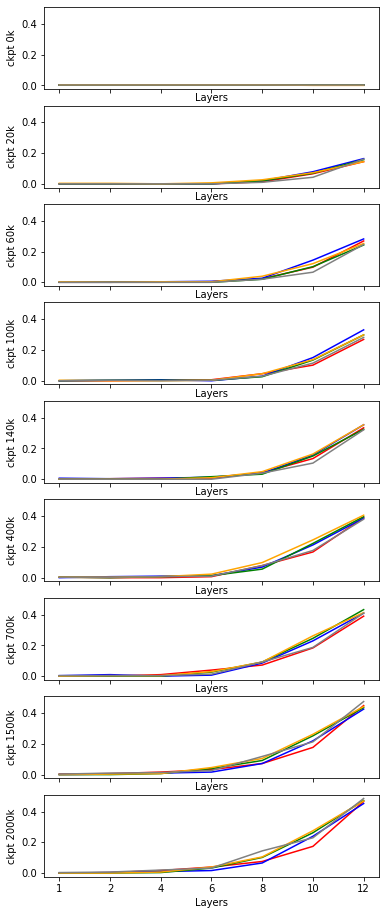

In [9]:
import matplotlib.pyplot as plt
num_seeds = 5
colors = ['r', 'b', 'g', 'orange', 'grey']

fig, ax = plt.subplots(9, 1, figsize=(6,16), sharex='col', sharey='col')
for i, ckpt in enumerate(['0', '20', '60', '100', '140', '400', '700', '1500', '2000']):
  for seed in range(5):
    ax[i].plot(range(0, 7), dataset_mean_p10_np[seed][i], c=colors[seed])
  ax[i].set_xticks(range(0, 7))
  ax[i].set_xticklabels(['1', '2', '4', '6', '8', '10', '12'])
  ax[i].set_xlabel("Layers")
  ax[i].set_ylabel("ckpt " + ckpt + 'k')
  # ax[i].set_title("GoogleRE Mean Results - Checkpoint " + ckpt)
plt.show()